## WeatherPy

WeatherPy is a python application, it randomly fetches various cities across the globe, identify latitude/longitude axis of those cities. It uses CitiPy python module to fetch cities and axis details.Using latitude/longitude, it queries OpenWeatherMap python module for the weather report of those cities. It creates various plots based on weather report vs latitude/longitude to see how weather changes across the globe.


In [1]:
# Import dependencies here

import json
import requests
from pprint import pprint
from datetime import datetime
import sys
from citipy import citipy
import openweathermapy as owm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# configure OpenWeatherMap API key
api_key = "43e2461431e6813de8f6e1f5935fbc78"

## Randomly fetch cities from the entire range of latitude and longitude ##

In [3]:
## Randomly fetch cities from the entire range of latitude and longitude

lat_range = np.random.uniform(low=-90, high=90, size=1500)
lng_range = np.random.uniform(low=-180, high=180, size=1500)

cities_coordinates = {}
for i in range(len(lat_range)): 
    lat = lat_range[i]
    lng = lng_range[i]
    city = citipy.nearest_city(lat, lng)
    city_str = f"{city.city_name.title()},{city.country_code.upper()}"
    if city_str in cities_coordinates:
        # continue to next coordinates if duplicate is found at same axis
        continue
    cities_coordinates[city_str] = [float("%0.2f" % lat), float("%0.2f" % lng)]

## Plot the city distribution based on latitude and longitude ##

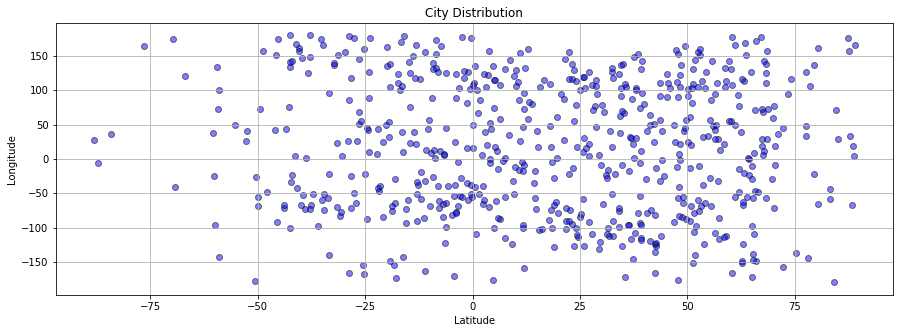

In [4]:
latitude_list = []
longitude_list = []

for city in cities_coordinates.keys():
    latitude_list.append(cities_coordinates[city][0])
    longitude_list.append(cities_coordinates[city][1])
    
plt.figure(figsize=(15,5))
plt.grid(True)
plt.scatter(latitude_list,
            longitude_list,
            marker='o',
            color='Blue',
            edgecolor='Black',
            alpha=0.5)

plt.title("City Distribution")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('CityDistribution_On_Latitude_Longitude.png')

plt.show()

## Retrive weather report of all the cities from OpenWeatherMap ##

In [5]:
cities_weather_report = {
    'City': [],
    'Country': [],
    'Latitude': [],
    'Longitue': [],
    'Date': [],
    'Cloudiness': [],
    'Humidity': [],
    'Max Temp': [],
    'Wind Speed': []
}

# OpenWeatherMap URL
owm_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

counter = 1
number_of_records = 500

print("Beginning Data Retrieval")
print("-----------------------------")

for i in cities_coordinates.keys():
    
    # split key into city and country
    city, country = i.split(',')

    print(f"Processing Record {counter} of Set {number_of_records} | {city}")

    # Build query URL
    weather_query = owm_url + "&appid=" + api_key + "&q=" + city
    try:
        print(weather_query)
        response = requests.get(weather_query)
        weather_report = response.json()
    
        # continue to next city if OpenWeatherMap failed to locate it
        if not response.ok:
            continue
        
        # fetch city, count, latitude and longitude data
        cities_weather_report['City'].append(city)
        cities_weather_report['Country'].append(country)
        cities_weather_report['Latitude'].append(cities_coordinates[i][0])
        cities_weather_report['Longitue'].append(cities_coordinates[i][1])
        
        # fetch date and convert it to readable format
        date = datetime.fromtimestamp(weather_report['dt']).strftime('%m/%d/%Y')
        cities_weather_report['Date'].append(date)
        
        # fetch cloudiness
        cities_weather_report['Cloudiness'].append(weather_report['clouds']['all'])
        
        # fetch humidity
        cities_weather_report['Humidity'].append(weather_report['main']['humidity'])

        # fetch max teperature
        cities_weather_report['Max Temp'].append(weather_report['main']['temp_max'])

        # fetch wind speed
        cities_weather_report['Wind Speed'].append(weather_report['wind']['speed'])
        
        if counter == number_of_records:
            break
        counter += 1
        
    except ConnectionError as e:
        print(f"Failed to make request due to : {e}")
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

cities_weather_report_df = pd.DataFrame(cities_weather_report)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 500 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Georgetown
Processing Record 2 of Set 500 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tessalit
Processing Record 3 of Set 500 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Kruisfontein
Processing Record 4 of Set 500 | Santa Cruz Del Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Santa Cruz Del Sur
Processing Record 5 of Set 500 | State College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=State College
Processing Record 6 of Set 500 | Mirnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f59

Processing Record 49 of Set 500 | Saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Saleaula
Processing Record 49 of Set 500 | Beisfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Beisfjord
Processing Record 50 of Set 500 | Vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Vaitupu
Processing Record 50 of Set 500 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Norman Wells
Processing Record 51 of Set 500 | Tongren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tongren
Processing Record 52 of Set 500 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Hilo
Processing Record 53 of Set 500 | Guarapari
http://api.openweathermap.or

Processing Record 97 of Set 500 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Pacific Grove
Processing Record 98 of Set 500 | Natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Natal
Processing Record 99 of Set 500 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Bambous Virieux
Processing Record 100 of Set 500 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tasiilaq
Processing Record 101 of Set 500 | Nieuw Amsterdam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Nieuw Amsterdam
Processing Record 102 of Set 500 | Along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Along
Processing Record 103 of Set 500 | Port-C

Processing Record 143 of Set 500 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Barrow
Processing Record 144 of Set 500 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Qasigiannguit
Processing Record 145 of Set 500 | Ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Ballina
Processing Record 146 of Set 500 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Srednekolymsk
Processing Record 147 of Set 500 | Talakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Talakan
Processing Record 148 of Set 500 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Moose Factory
Processing Record 149 of Set 500 | Kumluca

Processing Record 193 of Set 500 | Manaure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Manaure
Processing Record 194 of Set 500 | Sonoita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Sonoita
Processing Record 195 of Set 500 | Santiago Del Estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Santiago Del Estero
Processing Record 196 of Set 500 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Namibe
Processing Record 197 of Set 500 | Piacabucu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Piacabucu
Processing Record 198 of Set 500 | Hornepayne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Hornepayne
Processing Record 199 of Set 500 | Nemuro
ht

Processing Record 237 of Set 500 | Acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Acarau
Processing Record 237 of Set 500 | Baculin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Baculin
Processing Record 238 of Set 500 | Rio Gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Rio Gallegos
Processing Record 239 of Set 500 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Isangel
Processing Record 240 of Set 500 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Esperance
Processing Record 241 of Set 500 | Chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Chagda
Processing Record 241 of Set 500 | Novoagansk
http://api.openweath

Processing Record 282 of Set 500 | Temir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Temir
Processing Record 283 of Set 500 | Naifaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Naifaru
Processing Record 284 of Set 500 | Les Cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Les Cayes
Processing Record 285 of Set 500 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Souillac
Processing Record 286 of Set 500 | Vanderhoof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Vanderhoof
Processing Record 287 of Set 500 | Belushya Guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Belushya Guba
Processing Record 287 of Set 500 | Sinnamary
http://api.

Processing Record 325 of Set 500 | Lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Lolua
Processing Record 325 of Set 500 | Tralee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tralee
Processing Record 326 of Set 500 | Charkhi Dadri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Charkhi Dadri
Processing Record 327 of Set 500 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Port Alfred
Processing Record 328 of Set 500 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tiznit
Processing Record 329 of Set 500 | Amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Amahai
Processing Record 330 of Set 500 | Geraldton
http://api.openweathe

Processing Record 374 of Set 500 | Doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Doha
Processing Record 375 of Set 500 | Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Elizabeth City
Processing Record 376 of Set 500 | Necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Necochea
Processing Record 377 of Set 500 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Rio Grande
Processing Record 378 of Set 500 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Hambantota
Processing Record 379 of Set 500 | Central Point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Central Point
Processing Record 380 of Set 500 | Ankazoa

Processing Record 423 of Set 500 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Poum
Processing Record 424 of Set 500 | Praia Da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Praia Da Vitoria
Processing Record 425 of Set 500 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Puerto Escondido
Processing Record 426 of Set 500 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Tazovskiy
Processing Record 427 of Set 500 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Itarema
Processing Record 428 of Set 500 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Aden
Processing Record 429 of Set 500 | Carnarvon
htt

Processing Record 477 of Set 500 | Bezhanitsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Bezhanitsy
Processing Record 478 of Set 500 | Cumaribo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Cumaribo
Processing Record 478 of Set 500 | Pontes E Lacerda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Pontes E Lacerda
Processing Record 479 of Set 500 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Bud
Processing Record 480 of Set 500 | The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=The Valley
Processing Record 481 of Set 500 | Alice Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=43e2461431e6813de8f6e1f5935fbc78&q=Alice Town
Processing Record 482 of Set 500 | Aguascalien

In [6]:
cities_weather_report_df = cities_weather_report_df.dropna(how='any')
cities_weather_report_df.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitue      500
Max Temp      500
Wind Speed    500
dtype: int64

In [7]:
cities_weather_report_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitue,Max Temp,Wind Speed
0,Georgetown,40,SH,03/22/2018,58,-11.95,-19.66,87.80,18.34
1,Tessalit,8,ML,03/22/2018,15,19.66,1.60,67.94,14.70
2,Kruisfontein,8,ZA,03/22/2018,86,-52.68,25.46,65.69,13.24
3,Santa Cruz Del Sur,88,CU,03/22/2018,59,19.85,-78.86,84.32,9.89
4,State College,5,US,03/22/2018,38,40.57,-77.99,41.00,18.34


# write dataframe to CSV file ##

In [8]:
cities_weather_report_df.to_csv("CitiesWeatherReport.csv", sep=',', encoding='utf-8')

## Plot City Latitude vs. Max Temperature ##

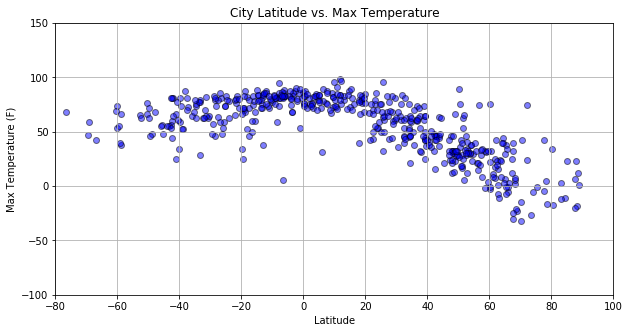

In [10]:
plt.figure(figsize=(10,5))
plt.grid(True)

plt.scatter(cities_weather_report_df['Latitude'],
            cities_weather_report_df['Max Temp'],
            marker='o',
            color='Blue',
            edgecolor='Black',
            alpha=0.5)

plt.xlim(-80, 100)
plt.ylim(-100, 150)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('City_Latitude_vs_MaxTemp.png')

plt.show()


## Plot City Latitude vs. Humidity ##

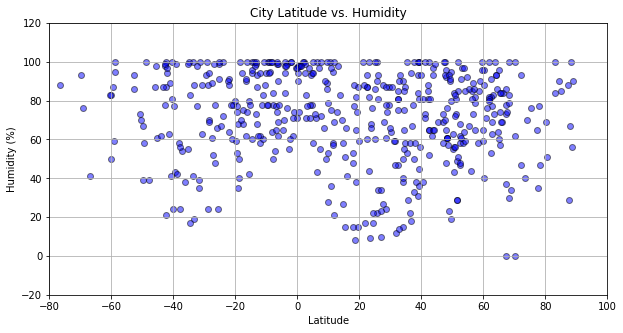

In [11]:
plt.figure(figsize=(10,5))
plt.grid(True)

plt.scatter(cities_weather_report_df['Latitude'],
            cities_weather_report_df['Humidity'],
            marker='o',
            color='Blue',
            edgecolor='Black',
            alpha=0.5)

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('City_Latitude_vs_Humidity.png')

plt.show()


## Plot City Latitude vs. Cloudiness ##

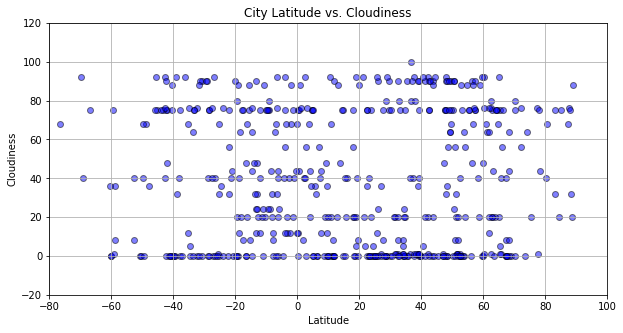

In [12]:
plt.figure(figsize=(10,5))
plt.grid(True)

plt.scatter(cities_weather_report_df['Latitude'],
            cities_weather_report_df['Cloudiness'],
            marker='o',
            color='Blue',
            edgecolor='Black',
            alpha=0.5)

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('City_Latitude_vs_Cloudiness.png')

plt.show()


## Plot City Latitude vs. Wind Speed ##

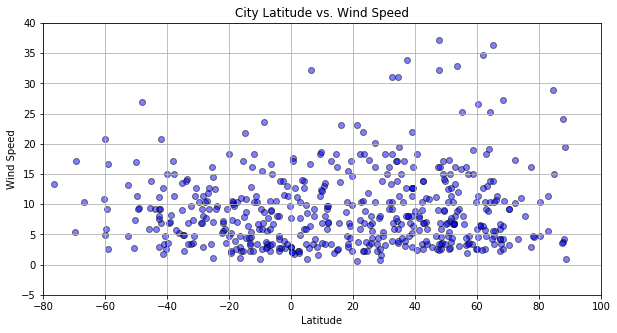

In [13]:
plt.figure(figsize=(10,5))
plt.grid(True)

plt.scatter(cities_weather_report_df['Latitude'],
            cities_weather_report_df['Wind Speed'],
            marker='o',
            color='Blue',
            edgecolor='Black',
            alpha=0.5)

plt.xlim(-80, 100)
plt.ylim(-5, 40)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('City_Latitude_vs_WindSpeed.png')

plt.show()


## Analysis

- Cities that are closer to the euqator have higher temperatures.
- Temperatures go lower and could go below 0 (Farenheit) as the latitude increases
- The variance of temperature ranges appears to increase the further a location is from the equator. 
- windiness would be medium at the mid-altiude and varies as per the latitude.
- Average temperatures for locations within ~5 degrees of the equator only vary by about 20 degrees Fahrenheit, while temperatures around 70 degress latitude vary from about -30 degrees to 35 degress Fahrenheit.
